# Mandelbrot

https://towardsdatascience.com/create-stunning-fractal-art-with-python-a-tutorial-for-beginners-c83817fcb64b

In [3]:
from PIL import Image

Image.effect_mandelbrot((512, 512), (-3, -2.5, 2, 2.5), 100).save('mandelbrot.png')

working with complex numbers

In [2]:
# create 
num1 = 2 + 1j
num2 = 12.3 + 23.1j


1.0

In [ ]:
#data type
type(num1)
type(num2)


In [3]:
# complex number
2 + 3j == complex(2, 3)

# parts
print(num1.real)
print(num1.imag)

2.0
1.0


In [8]:
# absolute value is the distance from the origin in the complex plane
# square root of sum of real and imaginary parts

abs(num1)

2.23606797749979

In [9]:
# first n elements for a given c 

def sequence(c, n=7) -> list:
    z_list = list()
    
    z = 0
    for _ in range(n):
        z = z ** 2 + c
        z_list.append(z)
    
    return z_list

In [10]:
import pandas as pd

df = pd.DataFrame()
df['element'] = [f"z_{i}" for i in range(7)]

# Random numbers
cs = [0, 1, -1, 2, 0.25, -.1]

for c in cs:
    df[f"c={c}"] = sequence(c)
    
df

,element,c=0,c=1,c=-1,c=2,c=0.25,c=-0.1
0,z_0,0,1,-1,2,0.250000,-0.100000
1,z_1,0,2,0,6,0.312500,-0.090000
2,z_2,0,5,-1,38,0.347656,-0.091900
3,z_3,0,26,0,1446,0.370865,-0.091554
4,z_4,0,677,-1,2090918,0.387541,-0.091618
5,z_5,0,458330,0,4371938082726,0.400188,-0.091606
6,z_6,0,210066388901,-1,19113842599189892819591078,0.410150,-0.091608


Three results: 

1. c is `1` or `2` - sequence is unbounded - approaching infinity
2. c is `-1` - sequence alternates between 0 and -1
3. c is `0.25` or `-0.1` - sequence is bounded 



Mandelbrot set is the set of complex numbers c for which the sequence remains bounded - where c is stable.

Mandelbrots stay bounded within a radius of two :

In [11]:
def is_stable(c, n_iterations=20):
    z = 0
    
    for _ in range(n_iterations):
        z = z ** 2 + c
        
        if abs(z) > 2:
            return False
    return True

In [15]:
print(is_stable(1))
print(is_stable(0.2))
print(is_stable(0.26))
print(is_stable(0.26, n_iterations=30))


False
True
True
False


In [16]:
# generate matrix of candidate values to iterate over

import numpy as np


def candidate_values(xmin, xmax, ymin, ymax, pixel_density):
    # Generate a 2D grid of real and imaginary values
    real = np.linspace(xmin, xmax, num=int((xmax-xmin) * pixel_density))
    imag = np.linspace(ymin, ymax, num=int((ymax-ymin) * pixel_density))
    
    # Cross each row of `xx` with each column of `yy` to create a grid of values
    xx, yy = np.meshgrid(real, imag)
    
    # Combine the real and imaginary parts into complex numbers
    matrix = xx + 1j * yy
    
    return matrix

In [18]:
c = candidate_values(-2, 0, -1.2, 1.2, 25)

c.shape

(60, 50)

In [19]:
c = candidate_values(-2, 0.7, -1.2, 1.2, pixel_density=25)

mandelbrot_mask = np.vectorize(is_stable)(c, n_iterations=20)
mandelbrot_mask.shape

(60, 67)

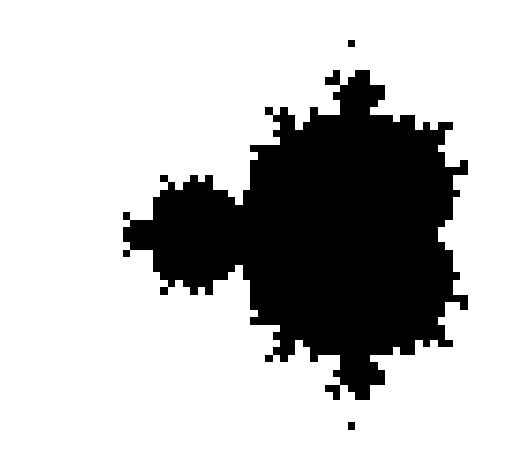

In [20]:
import matplotlib.pyplot as plt

plt.imshow(mandelbrot_mask, cmap="binary")

# Turn off the axes and use tight layout
plt.axis("off")
plt.tight_layout()

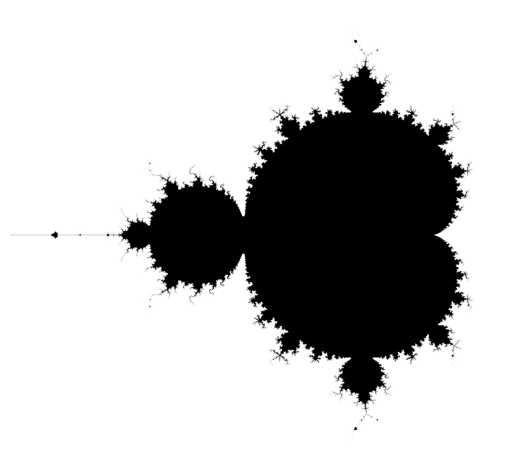

In [21]:
c = candidate_values(-2, 0.7, -1.2, 1.2, pixel_density=1024)

mandelbrot_mask = np.vectorize(is_stable)(c, n_iterations=30)

plt.imshow(mandelbrot_mask, cmap="binary")
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()

In [22]:
from dataclasses import dataclass

@dataclass
class Mandelbrot: # Inspired by the Real Python article shared above
    n_iterations: int
    
    def is_stable(self, c: complex) -> bool:
        z = 0
    
        for _ in range(self.n_iterations):
            z = z ** 2 + c
            if abs(z) > 2:
                return False

        return True

In [23]:
mandelbrot = Mandelbrot(n_iterations=30)

mandelbrot.is_stable(0.1)

True

In [24]:
mandelbrot.is_stable(1 + 4.4j)

False

In [25]:
@dataclass
class Mandelbrot:
    max_iterations: int
    
    def escape_count(self, c: complex) -> int:
        z = 0
        for iteration in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > 2:
                return iteration
        return self.max_iterations

First, we change n_iterations to max_iterations, as it makes more sense. Then, we create an escape_count method that:

* if c is unstable, returns the iteration in which it exceeds the magnitude of 2
* if c is stable, returns the max iteration count

In [26]:
mandelbrot = Mandelbrot(max_iterations=50)

mandelbrot.escape_count(-0.1) # stable

50

In [27]:
mandelbrot.escape_count(0.26) # unstable

29

In [28]:
@dataclass
class Mandelbrot:
    max_iterations: int
    
    def escape_count(self, c: complex) -> int:
        z = 0
        for i in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > 2:
                return i
        return self.max_iterations
    
    def stability(self, c: complex) -> float:
        return self.escape_count(c) / self.max_iterations

In [29]:
@dataclass
class Mandelbrot:
    max_iterations: int
    
    def escape_count(self, c: complex) -> int:
        z = 0
        for i in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > 2:
                return i
        return self.max_iterations
    
    def stability(self, c: complex) -> float:
        return self.escape_count(c) / self.max_iterations
    
    def is_stable(self, c: complex) -> bool:
        # Return True only when stability is 1
        return self.stability(c) == 1

In [30]:
mandelbrot = Mandelbrot(max_iterations=50)

mandelbrot.stability(-.1)

1.0

In [31]:
mandelbrot.is_stable(-.1)

True

In [32]:
mandelbrot.stability(2)

0.02

In [33]:
mandelbrot.is_stable(2)

False

In [48]:

@dataclass

class Mandelbrot:
    max_iterations: int
    
    def escape_count(self, c: complex) -> int:
        z = 0
        for i in range(self.max_iterations):
            z = z ** 2 + c
            if abs(z) > 2:
                return i
        return self.max_iterations
    
    def stability(self, c: complex) -> float:
        return self.escape_count(c) / self.max_iterations
    
    def is_stable(self, c: complex) -> bool:
        # Return True only when stability is 1
        return self.stability(c) == 1
    
    @staticmethod
    def candidate_values(xmin, xmax, ymin, ymax, pixel_density):
        real = np.linspace(xmin, xmax, num=int((xmax-xmin) * pixel_density))
        imag = np.linspace(ymin, ymax, num=int((ymax-ymin) * pixel_density))

        xx, yy = np.meshgrid(real, imag)
        matrix = xx + 1j * yy

        return matrix
    
    
    def plot(self, xmin, xmax, ymin, ymax, pixel_density=64, cmap="gray_r"):
        c = Mandelbrot.candidate_values(xmin, xmax, ymin, ymax, pixel_density)
        
        # Apply `stability` over all elements of `c`
        c = np.vectorize(self.stability)(c)
        
        plt.imshow(c, cmap=cmap, extent=[0, 1, 0, 1])
        plt.gca().set_aspect("equal")
        plt.axis('off')
        plt.tight_layout()

In [49]:
mandelbrot = Mandelbrot(max_iterations=30)


Mandelbrot(max_iterations=30)


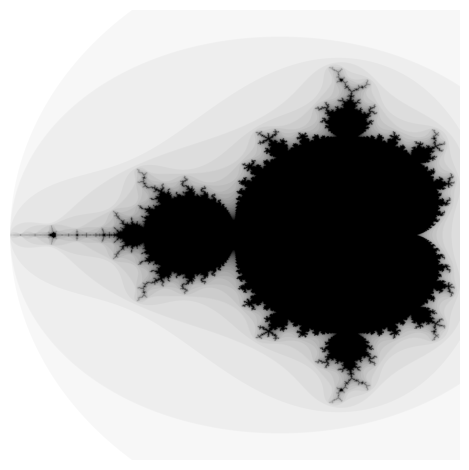

In [50]:

mandelbrot.plot(
    xmin=-2, xmax=0.5, 
    ymin=-1.5, ymax=1.5, 
    pixel_density=1024,
)

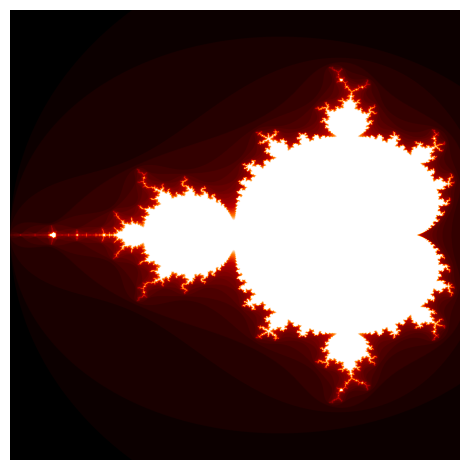

In [51]:
mandelbrot = Mandelbrot(max_iterations=30)

mandelbrot.plot(
    xmin=-2, xmax=0.5, 
    ymin=-1.5, ymax=1.5, 
    pixel_density=1024,
    cmap="gist_heat"
)